cd to Resources folder 
fuel prices:
mongoimport --type csv -d airline_data -c fuel_prices --headerline --drop fuel_prices_since_2000.csv
fare prices:
mongoimport --type csv -d airline_data -c fare_prices --headerline --drop average_daily_fares.csv

In [185]:
# Imports dependencies : mongo database, pretty printing tool, pandas, and the datetime library
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [130]:
# Sets up the mongo client to a variable
mongo = MongoClient(port=27017)

In [131]:
# Checks to make sure new database has been added
pprint(mongo.list_database_names())

['admin',
 'airline_data',
 'classDB',
 'config',
 'fruits_db',
 'gardenDB',
 'local',
 'met',
 'petsitly_marketing',
 'uk_food']


In [132]:
# Sets the database to a variable
plane_data = mongo['airline_data']

In [133]:
# Pulls example entry from fuel_prices collection
pprint(plane_data.fuel_prices.find_one())

{'': 2,
 '_id': ObjectId('641bf99494cb31d65df2ed77'),
 'date': '2023-03-09',
 'price ($/Gal)': 2.729}


In [134]:
# Pulls example entry from fare_prices collection
pprint(plane_data.fare_prices.find_one())

{'': 'LAX',
 '0': 352.99,
 '1': 336.82,
 '10': 369.76,
 '11': 394.88,
 '12': 401.84,
 '13': 411.92,
 '14': 422.89,
 '15': 398.62,
 '16': 355.9,
 '17': 352.52,
 '18': 352.79,
 '19': 356.56,
 '2': 342.6,
 '20': 291.59,
 '21': 322.2,
 '3': 338.08,
 '4': 319.71,
 '5': 339.33,
 '6': 360.48,
 '7': 370.01,
 '8': 389.39,
 '9': 343.06,
 '_id': ObjectId('641cab58b77f7bb0ad0f5e31')}


In [135]:
# Sets the fuel_prices collection to a variable
fuel_prices = plane_data['fuel_prices']

In [136]:
# Sets up a Pandas DataFrame for fuel price
fuel_prices_df = pd.DataFrame(list(fuel_prices.find()))
fuel_prices_df.head()

,_id,,date,price ($/Gal)
0,641bf99494cb31d65df2ed77,2,2023-03-09,2.729
1,641bf99494cb31d65df2ed78,5,2023-03-06,2.929
2,641bf99494cb31d65df2ed79,6,2023-03-03,2.987
3,641bf99494cb31d65df2ed7a,7,2023-03-02,2.911
4,641bf99494cb31d65df2ed7b,8,2023-03-01,3.016


In [137]:
# Sets up a Pandas DataFrame for fare prices
fare_prices = plane_data['fare_prices']

In [182]:
# Sets up a Pandas DataFrame for fare price
fare_prices_df = pd.DataFrame(list(fare_prices.find()))

fare_prices_df = fare_prices_df.rename(columns={'_id': 'ID', '':'Airport', '0': '2000', '1': '2001', '2':'2002',
                                                '3':'2003', '4':'2004','5':'2005','6':'2006','7':'2007','8':'2008',
                                                '9': '2009', '10': '2010','11': '2011','12': '2012','13':'2013',
                                                '14': '2014','15': '2015', '16': '2016','17': '2017','18': '2018',
                                                '19': '2019','20':'2020','21':'2021'})
fare_prices_df = fare_prices_df.drop('ID', axis=1)
fare_prices_df.head(5)

,Airport,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,LAX,352.99,336.82,342.60,338.08,319.71,339.33,360.48,370.01,389.39,...,401.84,411.92,422.89,398.62,355.90,352.52,352.79,356.56,291.59,322.20
1,SEA,336.56,319.69,311.93,320.81,316.60,328.96,353.61,354.13,353.61,...,382.80,380.51,379.42,367.00,332.40,335.44,337.31,336.51,287.04,308.81
2,DFW,441.85,413.06,386.03,393.59,369.48,368.89,389.36,364.99,406.16,...,430.71,415.66,425.24,383.25,348.99,362.79,383.43,402.57,323.76,319.66
3,PHX,267.64,250.89,248.33,251.06,250.33,269.04,284.35,283.19,305.19,...,331.83,348.40,359.32,349.17,327.14,327.12,338.57,348.77,280.89,292.23
4,MCO,279.28,265.63,267.78,263.16,241.75,240.57,256.71,253.00,260.03,...,278.43,294.75,312.40,291.16,253.87,249.33,249.74,251.75,215.74,220.15


In [158]:
# Sets up a Pandas Series using yearly average prices from the 10 busiest US airports
fare_years = []
for i in range(1, len(fare_prices_df.columns)):
    fare_years.append(fare_prices_df.iloc[:,i].mean())
fare_price = pd.Series(fare_years, index=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                                          '2010','2011','2012','2013','2014','2015', '2016','2017','2018','2019',
                                          '2020','2021'], name='fare price')
fare_price

2000    371.717
2001    350.405
2002    332.142
2003    332.255
2004    314.411
2005    321.474
2006    336.910
2007    336.068
2008    357.322
2009    317.719
2010    344.467
2011    365.770
2012    374.570
2013    383.778
2014    395.088
2015    371.516
2016    337.828
2017    333.140
2018    339.574
2019    345.696
2020    282.454
2021    296.650
Name: fare price, dtype: float64

In [178]:
# Sets up a Series for fuel prices, averages are grouped by all possible days for each year (about 250 / year)
fuel_prices_df['date'] = pd.to_datetime(fuel_prices_df['date'])
fuel = fuel_prices_df.groupby(fuel_prices_df['date'].dt.year)['price ($/Gal)'].mean()
fuel.drop(fuel.tail(2).index, inplace = True)
fuel_years = []
for index, value in fuel.items():
    fuel_years.append(value)
fuel_price = pd.Series(fuel_years, index=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                                          '2010','2011','2012','2013','2014','2015', '2016','2017','2018','2019',
                                          '2020','2021'], name='fuel price')
print(fuel_price)

2000    0.849952
2001    0.724988
2002    0.687064
2003    0.823600
2004    1.151137
2005    1.715598
2006    1.923020
2007    2.130913
2008    2.964447
2009    1.664290
2010    2.149880
2011    2.998512
2012    3.056190
2013    2.920492
2014    2.692702
2015    1.521794
2016    1.251706
2017    1.557940
2018    2.026851
2019    1.878711
2020    1.098829
2021    1.858215
Name: fuel price, dtype: float64


In [181]:
# Combines average fare prices with average fuel prices, 2000-21
fare_fuel_comparison_df =  pd.concat([fare_price, fuel_price], axis=1)
fare_fuel_comparison_df

,fare price,fuel price
2000,371.717,0.849952
2001,350.405,0.724988
2002,332.142,0.687064
2003,332.255,0.823600
2004,314.411,1.151137
2005,321.474,1.715598
2006,336.910,1.923020
2007,336.068,2.130913
2008,357.322,2.964447
2009,317.719,1.664290


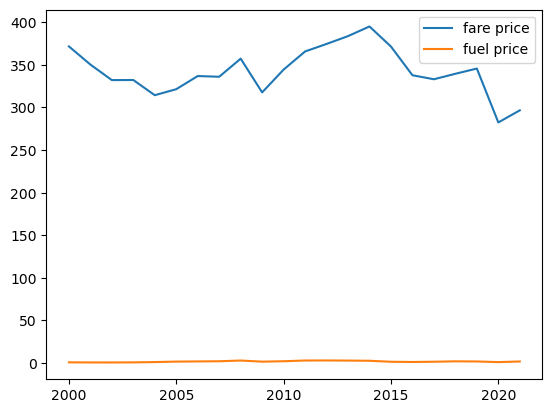

In [186]:
fare_fuel_comparison_df.plot()
plt.show()